In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-09-27 17:26:35.348955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-27 17:26:35.396858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%reload_ext autoreload
%autoreload 2

from spin_system import SpinSystem
from spin_system import interactions, plots

In [13]:
lattice_dim = 2
lattice_length = 32
lattice_replicas = 20

In [14]:
# ising_spin_system = SpinSystem(
#     lattice_dim=lattice_dim,
#     lattice_length=lattice_length,
#     lattice_replicas=lattice_replicas,
#     interaction_matrix=interactions.periodic_nn(lattice_dim, lattice_length)
# )

In [15]:
spherical_spin_system = SpinSystem(
    lattice_dim=lattice_dim,
    lattice_length=lattice_length,
    lattice_replicas=lattice_replicas,
    interaction_matrix=interactions.decaying(lattice_dim, lattice_length, 10, 2),
    model="spherical",
    spherical_constraint=True
)

spherical_results = spherical_spin_system.metropolis_sweep(1, theta_max = 2*np.pi, sweep_length = 100000)

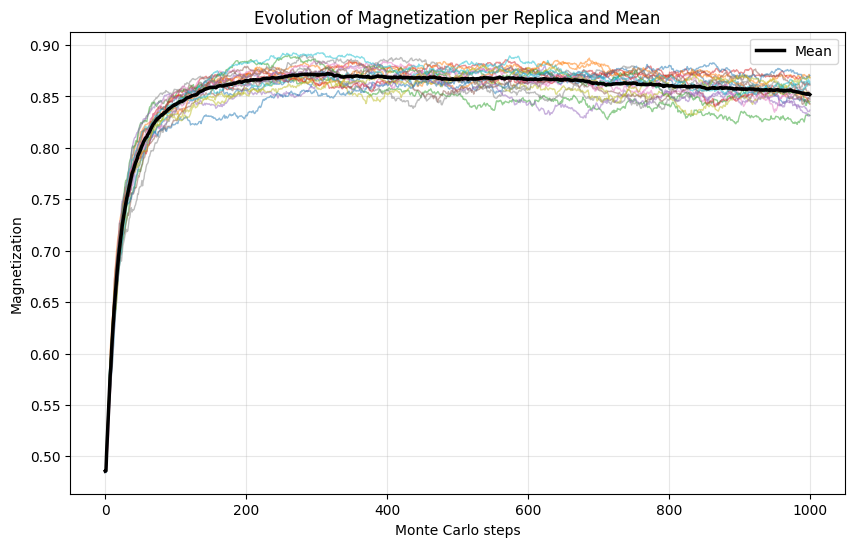

In [16]:
magnetization_np = spherical_results['magnetization_evolution'].numpy()

steps = magnetization_np.shape[0]
replicas = magnetization_np.shape[1]

plt.figure(figsize=(10, 6))

for r in range(replicas):
    plt.plot(range(steps), magnetization_np[:, r], alpha=0.5, lw=1)

mean_magnetization = magnetization_np.mean(axis=1)
plt.plot(range(steps), mean_magnetization, color="black", lw=2.5, label="Mean")

plt.xlabel("Monte Carlo steps")
plt.ylabel("Magnetization")
plt.title("Evolution of Magnetization per Replica and Mean")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


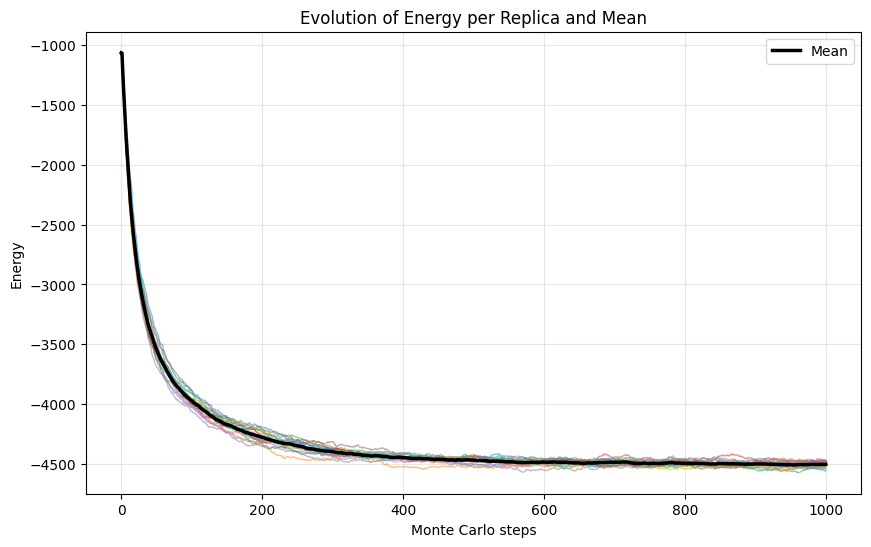

In [17]:
energy_np = spherical_results['energy_evolution'].numpy()

steps = energy_np.shape[0]
replicas = energy_np.shape[1]

plt.figure(figsize=(10, 6))

for r in range(replicas):
    plt.plot(range(steps), energy_np[:, r], alpha=0.5, lw=1)

mean_energy = energy_np.mean(axis=1)
plt.plot(range(steps), mean_energy, color="black", lw=2.5, label="Mean")

plt.xlabel("Monte Carlo steps")
plt.ylabel("Energy")
plt.title("Evolution of Energy per Replica and Mean")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()